In [7]:
#https://github.com/LearnDataSci/article-resources

import pandas as pd
# read in from csv using pd.read_cv

housing_price_index = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/DataScience/hpi/monthly-hpi.csv')
unemployment = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/DataScience/hpi/unemployment-macro.csv')
federal_funds_rate = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/DataScience/hpi/fed_funds.csv')
shiller = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/DataScience/hpi/shiller.csv')
gross_domestic_product = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/DataScience/hpi/gdp.csv')

In [10]:
# merge dataframes into single dataframe by date

df = shiller.merge(housing_price_index, on='date')\
                    .merge(unemployment, on='date')\
                    .merge(federal_funds_rate, on='date')\
                    .merge(gross_domestic_product, on='date')

df.head(10)

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0
5,2012-04-01,1386.43,230.09,2.05,185.29,14.6,7072,2363,6903,8.0,54.2,0.14,5771.2,63.7,203.7,15362.4
6,2012-07-01,1359.78,229.10,1.53,190.39,14.8,6983,2529,6916,6.9,56.2,0.16,5745.4,63.7,200.1,15380.8
7,2012-10-01,1437.82,231.32,1.75,190.84,14.4,6784,2433,6888,8.5,53.8,0.16,5841.4,63.8,203.5,15384.3
8,2013-01-01,1480.40,230.28,1.91,190.50,14.5,6534,2443,6912,8.1,53.7,0.14,5748.0,63.6,202.5,15491.9
9,2013-04-01,1570.70,232.53,1.76,198.43,14.0,6345,2347,7007,7.5,54.3,0.15,5756.8,63.4,203.5,15521.6


In [ ]:
## Skipping Exploratory Analysis

In [13]:
##  Ordinary Least Squares Assumptions  ##
## Linear Regression##
#<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/968be557dd22b1a2e536b8d22369cfdb37f58703"></img>

from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols

# fit model with .fit() and show results
# using statsmodels' formula API to invoke the below syntax,
# where write formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()
#summarize model
housing_model_summary = housing_model.summary()

#convert table to HTML and add colors to headers for exploratory purposes
HTML(
housing_model_summary\
.as_html()\
.replace(' Adj. R-Squared: ', ' Adj. R-Squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

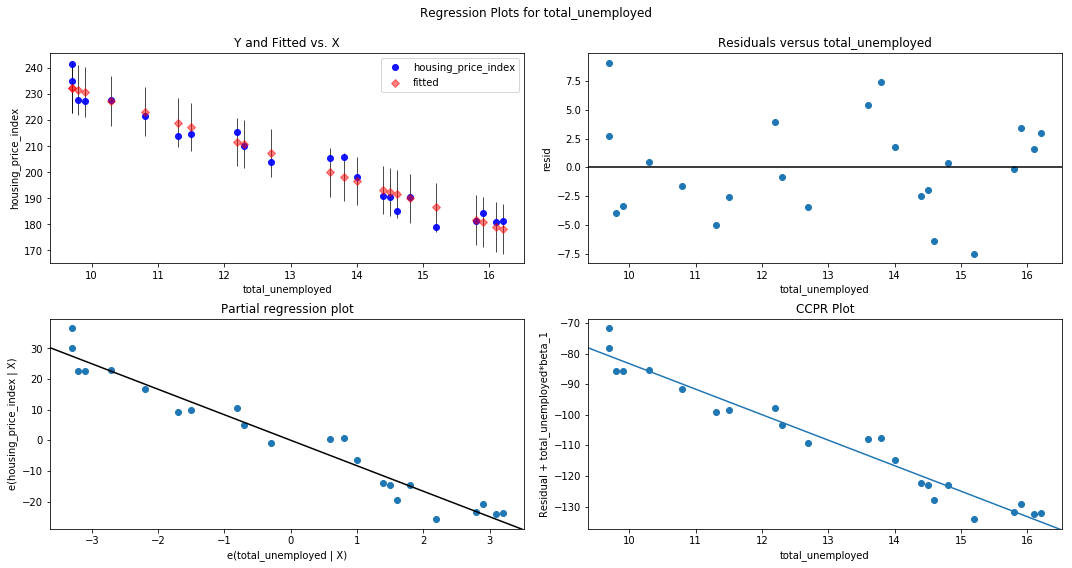

In [14]:
## Regression Plots ##
# this produces 4 regression plots for total_unemployed

# plots the graphs inside Jupyter Notebook
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify
# the predictor varaible to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

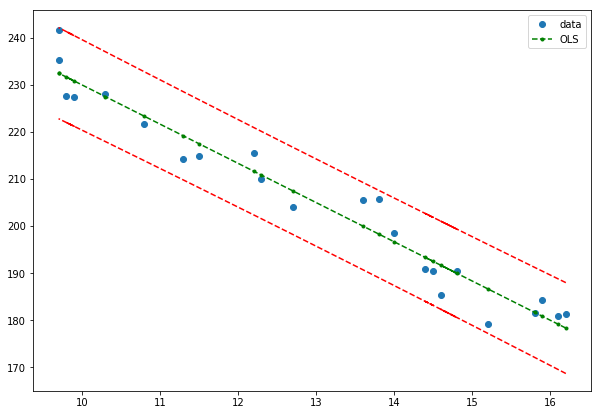

In [21]:
# This produces trend line

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

# predictor variable

x = df[['total_unemployed']]
# dependent variable
y = df[['housing_price_index']]

# retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label='OLS')
# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best')